Adapted by Carlos Toxtli http://www.carlostoxtli.com/#colab-linreg-2

Source: https://github.com/incertum/tutorials-data-science-basics/blob/master/Basics/Open-blackbox-basics-classification-binomial-logistic-regression.ipynb

### Open the Black Box of Machine Learning Basics - Part II
#### Binomial Logistic Regression - Iterative Method - Simple Gradient Descent Optimization

Melissa K    
Oct 2016

In [ ]:
# Python 3.5 environment
# Load libraries

import numpy as np
import numpy.matlib
from scipy import stats, optimize
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import linear_model, metrics, datasets
from mpl_toolkits.mplot3d import Axes3D, proj3d
from IPython import display


### Regression Modeling - Binomial Logistic Regression

Logistic Regression is a solution to the scenario where the target variable is categorical. This problem is otherwise known as CLASSIFICATION. Binomial is a special case where the target categories are binary, that is 2 categories, usually 0 and 1.

Preparation of the feature matrix X is the same as in the Tutorial [Open-blackbox-basics-linear-regression-modeling.ipynb](Open-blackbox-basics-linear-regression-modeling.ipynb). However, as opposed to linear least quares method, the betas will be solved using an iterative method, for example [Gradient Descent](https://en.wikipedia.org/wiki/Gradient_descent).

Here, the standard iris dataset with only 2 target categories (Setosa and Versicolor) is used.


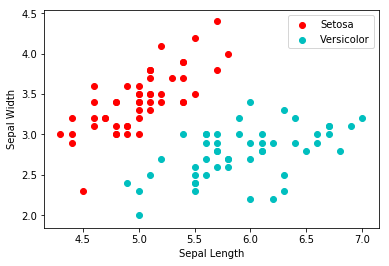

In [ ]:
iris = datasets.load_iris()
X = iris.data
X= X[:,:2] # use only first two features
target = iris.target
X, target = X[target != 2], target[target != 2]

plt.scatter(X[target == 0,0], X[target == 0,1], c='r',label='Setosa')
plt.scatter(X[target == 1,0], X[target == 1,1], c='c',label='Versicolor')
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.legend()
plt.show()

The [Sigmoid Function](https://en.wikipedia.org/wiki/Logistic_function) will be used to basically turn the problem into a problem of predicting a continuous variable (like in multiple linear regression). Based on a predicted probability, a target category (either 0 or 1) will be assigned. The probabilities are the results of evaluating a *sigmoid function* with feature matrix X and betas as input after training the betas with the known target values.
```python
def sigmoid(betas,X):
    return 1 / (1 + np.e**(-X.dot(betas)))
```

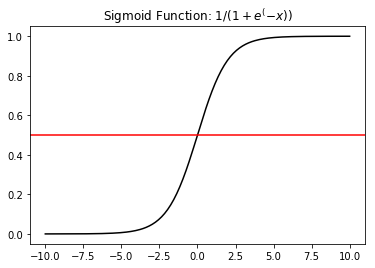

In [ ]:
# Sigmoid Function
xgrid = np.linspace(-10, 10, 200)
ygrid = 1 / (1 + np.e**(-xgrid))
plt.plot(xgrid, ygrid, c='k')
plt.axhline(.5, c='r')
plt.title('Sigmoid Function: $1/(1+e^(-x))$')
plt.show()

The following code cell contains the mathematical functions, ```sigmoid``` (see above), ```J_cost``` (cost function) and ```dJ_cost``` (first derivative of cost function) that will be needed to fit the model. Check out this post for the [mathematical derivations](http://math.stackexchange.com/questions/477207/derivative-of-cost-function-for-logistic-regression) or this very similar [Logistic Regression Python Tutorial](http://nbviewer.jupyter.org/github/tfolkman/learningwithdata/blob/master/Logistic%20Gradient%20Descent.ipynb).

In [ ]:

def sigmoid(betas,X):
    return 1 / (1 + np.e**(-X.dot(betas)))

def J_cost(betas, X, target):
    eval_sigmoid = sigmoid(betas,X)
    expr_1 = target * np.log(eval_sigmoid)
    expr_2 = (1-target) * np.log(1 - eval_sigmoid)
    J = - 1*(expr_1 + expr_2)
    return np.mean(J)

def dJ_cost(betas, X, target):
    dJ = (sigmoid(betas,X) - target).T.dot(X)
    return dJ


Without going too much into mathematical details the basic procedures for [Simple Gradient Descent Optimization](https://en.wikipedia.org/wiki/Gradient_descent) are as follows:

The overall goal is to use the feature matrix X and the known target examples to derive the best model coefficients/betas, just like in [Open-blackbox-basics-linear-regression-modeling.ipynb](Open-blackbox-basics-linear-regression-modeling.ipynb). The key difference here is that the problem cannot be solved using a closed-form solution, therefore, the model betas are derived in an iterative fashion until they are determined to be *good* enough (based on a threshold criteria). 

Main Steps:

1. Start with an initial guess of all coefficients/betas, here simply zeros.
2. Using these initial betas calculate the initial cost (via evaluating ```J_cost``` with initial guess of betas, feature matrix X and known training target values). In math the goal is always to minimize this cost, because this means that the model fits the data best which equates to having found the best coefficients/betas.
3. Start storing the cost to a variable called ```curr_cost``` (current cost) and once the while loop starts this cost value gets preserved and continuously updated via assigning it to ```prev_cost``` (previous cost). That way the change of the values between consecutive iterations can be computed (difference between current and previous cost).
4. The while loop goes on until the difference between current and previous cost is small enough. The threshold value is declared prior (```converge_change```). This phenomenon is commonly referred to as *convergence* (see plots below). It is assumed that when the cost value doesn't change much anymore the minimum cost was found (see last 3D plot where ball rolls into global minimum). While this is true here, in more complicated optimization problems this can be false, and the ball could be *stuck in a local minimum* instead of the global minimum.
5. But how are the new betas computed to calculate the new cost every iteration? This is where the derivative of the cost function ```dJ_cost``` comes in. This is called *gradient*.
6. The gradient is used to calculate the new/hopefully better betas. Subsequently the new cost can be calculated. There is one other parameter that is very important, this is the *learning rate*. Together with the magnitude of the gradient it determines how drastically the betas are updated as well as in which direction (increasing or decreasing) ```betas = betas - lr * gradient```.
7. After leaving the while loop with the best betas found, the sigmoid function can be evaluated with these best betas and the feature matrix X. Evaluating this function returns the probability value that the observation belongs to one class or another (e.g. above or below 0.5).


Confusion Matrix 
 [[49  0]
 [ 1 50]]


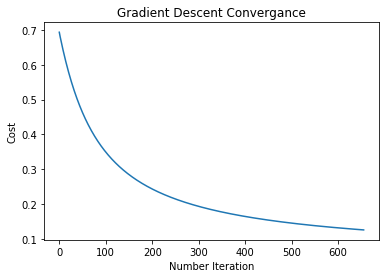

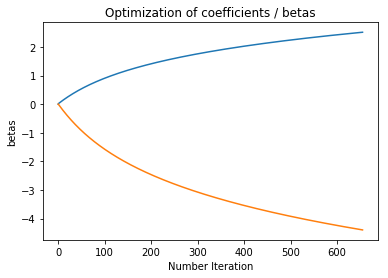

Satisfactory Convergance to pre-specified precision occurred after: 656 iterations


In [ ]:
lr=.001 # learning rate
converge_change=.0001 # precision

betas = np.zeros(X.shape[1]) # initial guess all coefficients "betas", later called "theta" = 0
prev_cost = 0 # initialize
curr_cost = J_cost(betas, X, target) # initial cost
cost_array = []
cost_array.append(curr_cost)
betas_array = []
betas_array.append(betas)

# do until convergance is at desired level of precision
while abs(curr_cost - prev_cost) > converge_change:
    prev_cost = curr_cost  # previous cost (=one iteration before) and current cost
    # the gradient below is the derivative of J_cost function (see def J_cost above)
    gradient = dJ_cost(betas, X, target)
    #print(gradient)
    betas = betas - lr * gradient
    curr_cost = J_cost(betas, X, target)
    cost_array.append(curr_cost)
    betas_array.append(betas)
betas_array=np.array(betas_array)
cost_array=np.array(cost_array)
# betas, that is, the coefficients are now the optimized betas
        
target_predict1_proba = sigmoid(betas,X)
target_predict1 = np.where(target_predict1_proba >= .5, 1, 0)
print('Confusion Matrix \n', metrics.confusion_matrix(target_predict1,target)) 
#print(target_predict1_proba)


plt.plot(cost_array)
plt.title('Gradient Descent Convergance')
plt.ylabel('Cost')
plt.xlabel('Number Iteration')
plt.show()
plt.plot(betas_array)
plt.title('Optimization of coefficients / betas')
plt.ylabel('betas')
plt.xlabel('Number Iteration')
plt.show()

print('Satisfactory Convergance to pre-specified precision occurred after: %.0f iterations' %(len(cost_array)))

In [ ]:
### 3D manifold of Gradient Descent Optimiziation / minimizing cost function J
from matplotlib import cm
Xgrid_betas, Ygrid_betas = np.meshgrid(np.arange(-5,3, .01), np.arange(-5, 3, .01))
z = np.array([J_cost(np.array([x,y]),X,target) for x,y in zip(np.ravel(Xgrid_betas), np.ravel(Ygrid_betas))])
Zgrid_J = z.reshape(Xgrid_betas.shape)

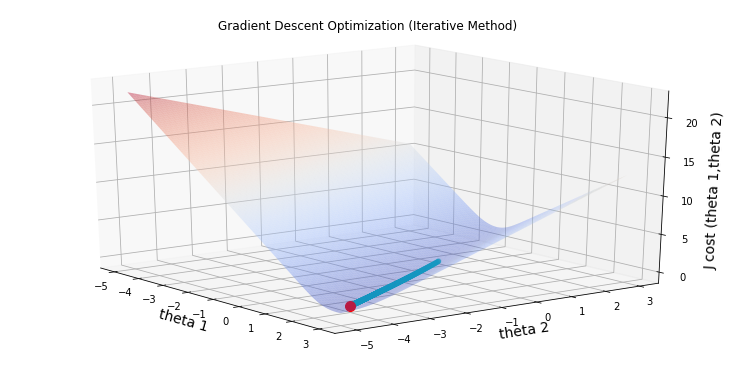

In [ ]:

fig = plt.figure(figsize=(10,5))
ax = Axes3D(fig)
ax.scatter(betas_array[:,0],betas_array[:,1],cost_array,c='c')
ax.scatter(betas_array[-1,0],betas_array[-1,1],cost_array[-1],c='r',s=100)
ax.plot_surface(Xgrid_betas, Ygrid_betas, Zgrid_J,rstride=8, cstride=8, alpha=0.4,cmap=cm.coolwarm, linewidth=0.2)
ax.set_title('Gradient Descent Optimization (Iterative Method)')
ax.set_xlabel('theta 1',fontsize=14)
ax.set_ylabel('theta 2',fontsize=14)
ax.set_zlabel('J cost (theta 1,theta 2)',fontsize=14)
ax.view_init(elev=20, azim=-37)

In [ ]:
# using sklearn library
lm = linear_model.LogisticRegression()
lm.fit(X, target)
target_predict2 = lm.predict(X)
target_predict2_proba=lm.predict_proba(X)
#print(target_predict2)
#print(target_predict2_proba)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [ ]:
### Note: better use libraries as they use very optimized solver methods, 
# much better than this simple gradient descent implementation!
# Alternatively use the scipy optimized solvers for your own code

betas_lbfgs = optimize.fmin_l_bfgs_b(J_cost, x0=np.zeros(X.shape[1]), args=(X,target), fprime=dJ_cost)
